In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, MaxPooling2D, Conv2D
from tensorflow.keras.utils import to_categorical

In [26]:
# (x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

train_df = pd.read_csv('./fashion_mnist/fashion-mnist_train.csv',dtype=np.uint8,nrows=10000)
test_df = pd.read_csv('./fashion_mnist/fashion-mnist_test.csv',dtype=np.uint8,nrows=2000)

x_train = (train_df.drop("label",axis=1).values/255.0).reshape(-1,28,28,1)
x_test = (test_df.drop("label",axis=1).values/255.0).reshape(-1,28,28,1)
y_train = to_categorical(train_df["label"],10)
y_test = to_categorical(test_df["label"],10)

In [27]:
model = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])

In [28]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10,batch_size=512,validation_data=(x_test,y_test))

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.3249 - loss: 1.9497 - val_accuracy: 0.6810 - val_loss: 0.9020
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.6567 - loss: 0.9539 - val_accuracy: 0.7485 - val_loss: 0.6915
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.7089 - loss: 0.7718 - val_accuracy: 0.7585 - val_loss: 0.6232
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7525 - loss: 0.6789 - val_accuracy: 0.7835 - val_loss: 0.5696
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7705 - loss: 0.6239 - val_accuracy: 0.7815 - val_loss: 0.5552
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7814 - loss: 0.5820 - val_accuracy: 0.8060 - val_loss: 0.5203
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7907 - loss: 0.5626 - val_accuracy: 0.8115 - val_loss: 0.4995
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8081 - loss: 0.5271 - val_accuracy: 0.8190 - v

In [29]:
loss, accuracy = model.evaluate(x_test,y_test)
print(f"Test Loss: {loss:.2f}")
print(f"Test Accuracy: {accuracy:.2f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8370 - loss: 0.4494
Test Loss: 0.46
Test Accuracy: 0.83


In [30]:
pred_probs = model.predict(x_test)
predictions = np.argmax(pred_probs,axis=1)
actual = np.argmax(y_test,axis=1)

for i in range(10):
    print(f"Predicted: {predictions[i]} Actual: {actual[i]}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 2 Actual: 2
Predicted: 6 Actual: 2
Predicted: 3 Actual: 3
Predicted: 2 Actual: 2
Predicted: 8 Actual: 8
Predicted: 4 Actual: 6
Predicted: 5 Actual: 5
Predicted: 0 Actual: 0


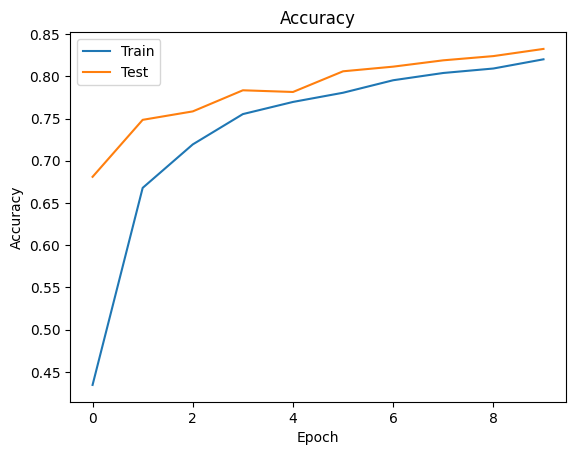

In [31]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Test')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

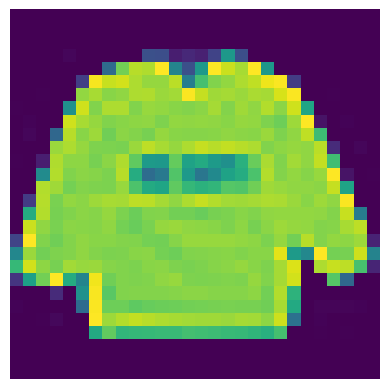

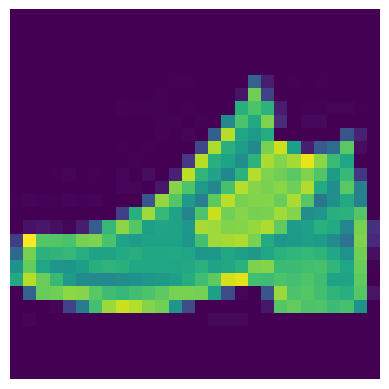

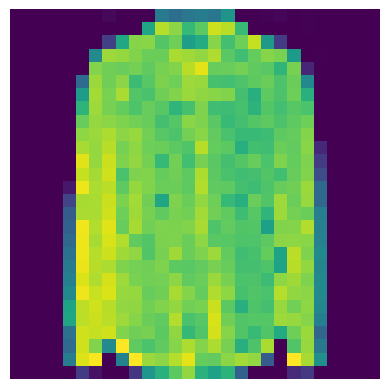

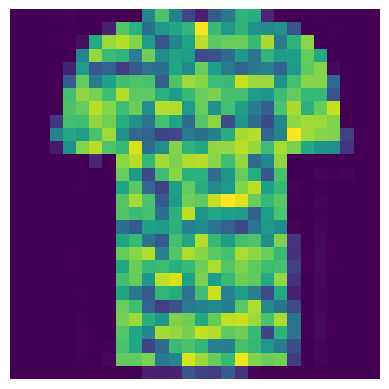

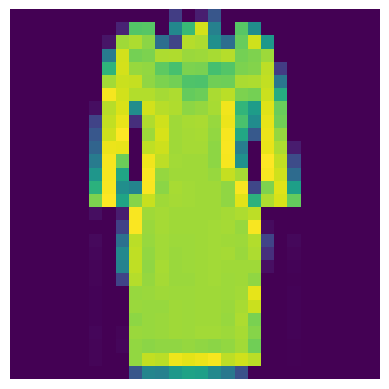

In [32]:
for i in range(5):
    plt.imshow(x_train[i].reshape(28,28))
    plt.axis('off')
    plt.show()